In [1]:
#installing this version, bert model seems to work in this environment
#might have to restart the kernel for the bert model
!pip install tensorflow==2.8.0rc0
!pip install transformers==4.20.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.2/492.2 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 952.8/952.8 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 25.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.3/77.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 72.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 118.3 MB/s eta 0:00:00
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3070, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2863, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3061, in _parsed_pkg_info
    return self._pkg_info
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2863, in __getattr__
    raise AttributeError(attr)
Attrib

In [2]:
#checking the current version of tensorflow and transformers
!pip show tensorflow transformers

Name: tensorflow
Version: 2.8.0rc0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, keras-preprocessing, libclang, numpy, opt-einsum, protobuf, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, tf-estimator-nightly, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras
---
Name: transformers
Version: 4.42.4
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: /usr/local/lib/pytho

In [3]:
#Imports
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# Data processing
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

# Transformers
from transformers import BertTokenizerFast, TFBertModel, RobertaTokenizerFast, TFRobertaModel, AutoTokenizer

# Keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense, GlobalMaxPool1D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from collections import Counter

# Download NLTK data
nltk.download('wordnet')
nltk.download('stopwords')

# Setting seed
seed = 42

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
#uploading my csv file
from google.colab import files


uploaded = files.upload()

Saving cyberbullying_tweets.csv to cyberbullying_tweets.csv


In [6]:
#defining my dataframe
import io
df = pd.read_csv(io.BytesIO(uploaded['cyberbullying_tweets.csv']))

In [7]:
df

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


In [8]:
df['cyberbullying_type'].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [10]:
df.nunique()

,0
tweet_text,46017
cyberbullying_type,6


In [11]:
df['cyberbullying_type'].value_counts()

,count
cyberbullying_type,
religion,7998
age,7992
gender,7973
ethnicity,7961
not_cyberbullying,7945
other_cyberbullying,7823


In [12]:
df.duplicated().sum()

36

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
import re
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Function to clean and preprocess text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove special characters, URLs, and numbers
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\d+', '', text)
    # Lemmatize words and remove stopwords
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop]
    # Join tokens back into a single string
    cleaned_text = ' '.join(tokens)
    return cleaned_text

# Applying preprocessing to the 'tweet_text' column
df['cleaned_text'] = df['tweet_text'].apply(preprocess_text)

# Display the cleaned DataFrame
print("\nCleaned DataFrame:")
print(df[['tweet_text', 'cleaned_text']].head())

# Vectorize the cleaned text using TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['cleaned_text'])

# Display the TF-IDF matrix
print("\nTF-IDF Matrix:")
print(tfidf_matrix.toarray())


Cleaned DataFrame:
                                          tweet_text  \
0  In other words #katandandre, your food was cra...   
1  Why is #aussietv so white? #MKR #theblock #ImA...   
2  @XochitlSuckkks a classy whore? Or more red ve...   
3  @Jason_Gio meh. :P  thanks for the heads up, b...   
4  @RudhoeEnglish This is an ISIS account pretend...   

                                        cleaned_text  
0      word   katandandre   food crapilicious    mkr  
1    aussietv white    mkr   theblock   imacelebr...  
2    xochitlsuckkks classy whore   red velvet cup...  
3    jason_gio meh    p   thank head   concerned ...  
4    rudhoeenglish isis account pretend kurdish a...  

TF-IDF Matrix:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [15]:
df['cyberbullying_type'].value_counts()

,count
cyberbullying_type,
religion,7997
age,7992
ethnicity,7959
gender,7948
not_cyberbullying,7937
other_cyberbullying,7823


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-17-b990c45b412a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cyberbullying_type', data=df, palette='pastel')


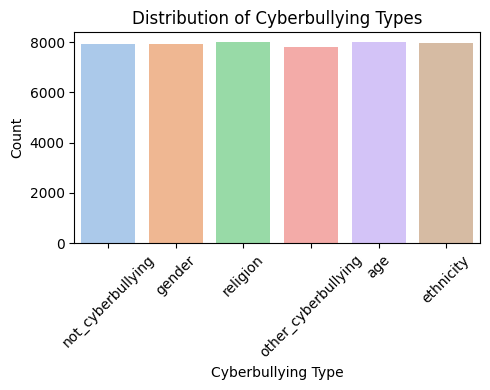

In [17]:
#Bar plot to see the distribution
plt.figure(figsize=(5, 4))
sns.countplot(x='cyberbullying_type', data=df, palette='pastel')
plt.xlabel('Cyberbullying Type')
plt.ylabel('Count')
plt.title('Distribution of Cyberbullying Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

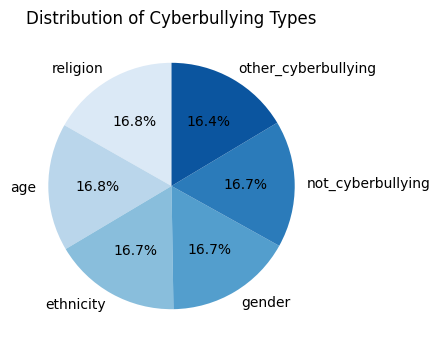

In [18]:
#pie chart to see the distribution
blue_palette = sns.color_palette('Blues')

plt.figure(figsize=(4, 4))
df['cyberbullying_type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=blue_palette)
plt.ylabel('')
plt.title('Distribution of Cyberbullying Types')
plt.show()

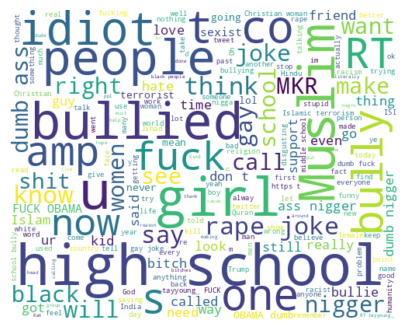

In [19]:
#creating a wordcloud to highlight important words
from wordcloud import WordCloud

# Combine all tweet texts into one string
tweets_all = " ".join(tweet for tweet in df['tweet_text'])

cb_wordcloud = WordCloud(width=500, height=400, background_color ='white').generate(tweets_all)

plt.figure(figsize=(5, 6))
plt.imshow(cb_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

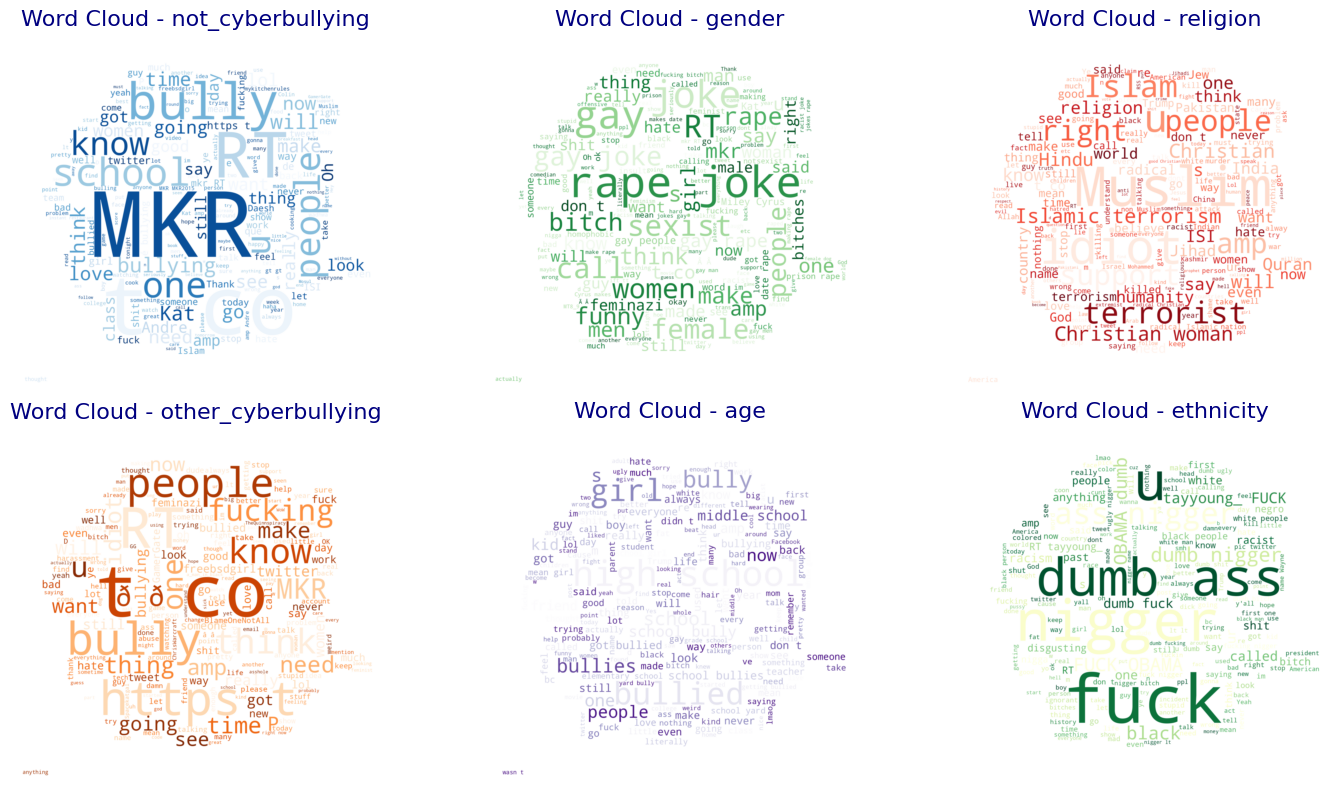

In [20]:
#wordcloud to see different types of cyber bullying
import requests
from io import BytesIO
from PIL import Image
import numpy as np

cb_categories = df['cyberbullying_type'].unique()
plt.figure(figsize=(15, 8))

# Define the mask image URL
url_mask = 'https://media.istockphoto.com/id/1301795370/vector/concept-victim-of-bullying-cyber-harassment-cyberstalking-portrait-of-woman-with-frustration.jpg?s=2048x2048&w=is&k=20&c=eAWFdAWd_VYXCvCa_iuP8TV9t3sOuaZqt2NK-ws6M9w='

# Define a list of colormaps for each word cloud
color_maps = ['Blues', 'Greens', 'Reds', 'Oranges', 'Purples', 'YlGn']

for i, category in enumerate(cb_categories):
    # Concatenating all tweet texts for the current category
    text = " ".join(df[df['cyberbullying_type'] == category]['tweet_text'])

    r = requests.get(url_mask)
    wc_mask = np.array(Image.open(BytesIO(r.content)))

    # Generating word cloud for the current category with a different colormap
    wordcloud = WordCloud(width=800, height=400, background_color='white', mask=wc_mask, colormap=color_maps[i % len(color_maps)]).generate(text)

    plt.subplot(2, 3, i+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud - {category}', fontsize=16, color='navy')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [21]:
#After looking at the wordcloud,removing the type other_cyberbullying because the words highlighted seems more general.
df = df[df['cyberbullying_type'] != 'other_cyberbullying']

In [22]:
### NAIVE BAYES

In [23]:

df['cyberbullying_type'] = df['cyberbullying_type'].map({
    'not_cyberbullying': 0,
    'ethnicity': 1,
    'gender': 2,
    'age': 3,
    'religion': 4
})

<ipython-input-23-912ce3c26e35>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cyberbullying_type'] = df['cyberbullying_type'].map({


In [24]:
# Text and labels
texts = df['cleaned_text'].values
labels = df['cyberbullying_type'].values

# Splitting the data
texts_temp, texts_test, labels_temp, labels_test = train_test_split(texts, labels, test_size=0.1, stratify=labels, random_state=42)
texts_train, texts_valid, labels_train, labels_valid = train_test_split(texts_temp, labels_temp, test_size=0.1, stratify=labels_temp, random_state=42)

# Vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
texts_train_tfidf = tfidf_vectorizer.fit_transform(texts_train)
texts_valid_tfidf = tfidf_vectorizer.transform(texts_valid)
texts_test_tfidf = tfidf_vectorizer.transform(texts_test)

# Training Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(texts_train_tfidf, labels_train)

# Predict on validation and test sets
labels_valid_pred = nb_model.predict(texts_valid_tfidf)
labels_test_pred = nb_model.predict(texts_test_tfidf)

# Evaluating model performance
print("Validation Accuracy:", accuracy_score(labels_valid, labels_valid_pred))
print("Test Accuracy:", accuracy_score(labels_test, labels_test_pred))
print("\nClassification Report:\n", classification_report(labels_test, labels_test_pred))
print("\nConfusion Matrix:\n", confusion_matrix(labels_test, labels_test_pred))

Validation Accuracy: 0.8410041841004184
Test Accuracy: 0.839859437751004

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.50      0.64       794
           1       0.91      0.88      0.90       796
           2       0.89      0.86      0.87       795
           3       0.77      0.99      0.87       799
           4       0.80      0.97      0.88       800

    accuracy                           0.84      3984
   macro avg       0.85      0.84      0.83      3984
weighted avg       0.85      0.84      0.83      3984


Confusion Matrix:
 [[398  43  76 158 119]
 [  1 703   6  43  43]
 [ 53  20 681  16  25]
 [  1   3   2 788   5]
 [  2   4   3  15 776]]


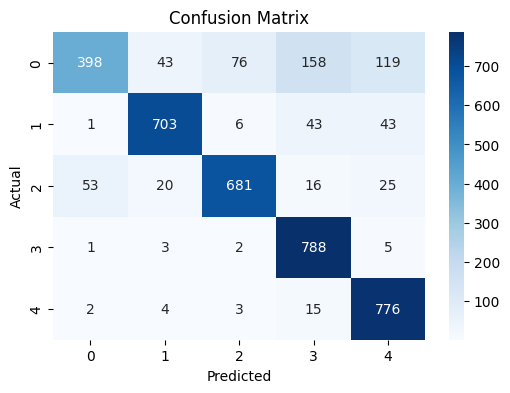

In [25]:
# Compute confusion matrix
conf_matrix = confusion_matrix(labels_test, labels_test_pred)

# Visualizing confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(labels), yticklabels=np.unique(labels))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
# Text and labels
texts = df['cleaned_text'].values
labels = df['cyberbullying_type'].values

# Splitting the data
texts_temp, texts_test, labels_temp, labels_test = train_test_split(texts, labels, test_size=0.1, stratify=labels, random_state=42)
texts_train, texts_valid, labels_train, labels_valid = train_test_split(texts_temp, labels_temp, test_size=0.1, stratify=labels_temp, random_state=42)

# Vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
texts_train_tfidf = tfidf_vectorizer.fit_transform(texts_train)
texts_valid_tfidf = tfidf_vectorizer.transform(texts_valid)
texts_test_tfidf = tfidf_vectorizer.transform(texts_test)

# Training Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(texts_train_tfidf, labels_train)

# Predict on validation and test sets
labels_valid_pred = lr_model.predict(texts_valid_tfidf)
labels_test_pred = lr_model.predict(texts_test_tfidf)

# Evaluating model performance
print("Validation Accuracy:", accuracy_score(labels_valid, labels_valid_pred))
print("Test Accuracy:", accuracy_score(labels_test, labels_test_pred))
print("\nClassification Report:\n", classification_report(labels_test, labels_test_pred))

Validation Accuracy: 0.9216178521617853
Test Accuracy: 0.9319779116465864

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       794
           1       0.98      0.97      0.98       796
           2       0.95      0.87      0.91       795
           3       0.95      0.98      0.96       799
           4       0.95      0.96      0.96       800

    accuracy                           0.93      3984
   macro avg       0.93      0.93      0.93      3984
weighted avg       0.93      0.93      0.93      3984



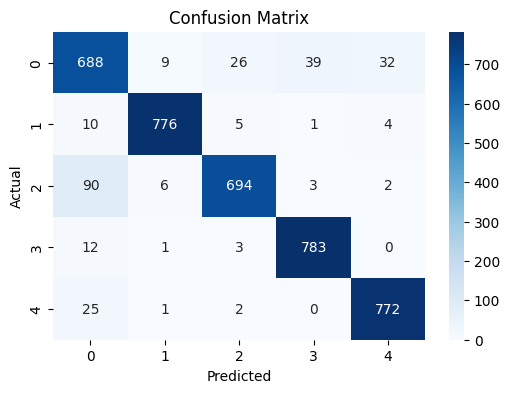

In [28]:
# Compute confusion matrix
conf_matrix_lr = confusion_matrix(labels_test, labels_test_pred)

# Visualizing confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(labels), yticklabels=np.unique(labels))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## BERT

In [29]:
#defining train and test
X_train, X_test = train_test_split(df, test_size = 0.3, random_state = 42, shuffle = True, stratify = df.cyberbullying_type)

In [30]:
#taking a proportion of sample because bert is computationally very intensive
X_train  = X_train[:10000]
X_test = X_test[:500]

In [31]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [32]:
#tokenizing the train and test data
x_train = tokenizer(
    text=X_train['cleaned_text'].tolist(),
    add_special_tokens=True,
    max_length=100,
    truncation=True,
    padding='max_length',  # Ensure padding to max_length
    return_tensors='tf',
    return_token_type_ids=False,
    return_attention_mask=True,
    verbose=True
)

x_test = tokenizer(
    text=X_test['cleaned_text'].tolist(),
    add_special_tokens=True,
    max_length=100,
    truncation=True,
    padding='max_length',  # Ensure padding to max_length
    return_tensors='tf',
    return_token_type_ids=False,
    return_attention_mask=True,
    verbose=True
)

# Verifying the shapes of tokenized inputs
print(x_train['input_ids'].shape)
print(x_test['input_ids'].shape)

(10000, 100)
(500, 100)


In [33]:
assert x_train['input_ids'].shape[1] == 100, "Train input_ids shape mismatch"
assert x_test['input_ids'].shape[1] == 100, "Test input_ids shape mismatch"

# shapes for debugging
print("Train input_ids shape:", x_train['input_ids'].shape)
print("Train attention_mask shape:", x_train['attention_mask'].shape)
print("Test input_ids shape:", x_test['input_ids'].shape)
print("Test attention_mask shape:", x_test['attention_mask'].shape)

Train input_ids shape: (10000, 100)
Train attention_mask shape: (10000, 100)
Test input_ids shape: (500, 100)
Test attention_mask shape: (500, 100)


In [34]:
bert = TFBertModel.from_pretrained('bert-base-cased')

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [35]:
#defining the model
#ref:https://www.analyticsvidhya.com/blog/2021/12/multiclass-classification-using-transformers/
max_len = 100


input_ids = Input(shape=(max_len,), dtype=tf.int32, name='input_ids')
input_mask = Input(shape=(max_len,), dtype=tf.int32, name='attention_mask')

embeddings = bert(input_ids, attention_mask=input_mask)[0]
out = tf.keras.layers.GlobalMaxPool1D()(embeddings)
out = Dense(128, activation='relu')(out)
out = tf.keras.layers.Dropout(0.1)(out)
out = Dense(32, activation='relu')(out)

y = Dense(5, activation='sigmoid')(out)

model = tf.keras.Model(inputs=[input_ids, input_mask], outputs=y)
model.layers[2].trainable = True

In [36]:
#defining the optimiser
optimizer = Adam(
    learning_rate=5e-05,
    epsilon=1e-08,
    decay=0.01,
    clipnorm=1.0
)

loss = CategoricalCrossentropy(from_logits=True)
metric = CategoricalAccuracy('balanced_accuracy')

model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=metric)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 100)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 100)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  108310272   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 100,                                           

In [37]:
#training bert model
#usually takes a lot of time
bert_train = model.fit(
    x={'input_ids': x_train['input_ids'], 'attention_mask': x_train['attention_mask']},
    y=to_categorical(X_train.cyberbullying_type),
    validation_data=(
        {'input_ids': x_test['input_ids'], 'attention_mask': x_test['attention_mask']},
        to_categorical(X_test.cyberbullying_type)
    ),
    epochs=1,
    batch_size=32
)

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 [==============================] - 7125s 23s/step - loss: 0.3423 - balanced_accuracy: 0.8811 - val_loss: 0.3113 - val_balanced_accuracy: 0.8940


In [38]:
pred_output = model.predict({'input_ids':x_test['input_ids'], 'attention_mask':x_test['attention_mask']})

In [39]:
pred_output[0]

array([0.17836607, 0.14879122, 0.9827864 , 0.25720078, 0.10623825],
      dtype=float32)

In [40]:
predicted_y = np.argmax(pred_output, axis=1)

In [41]:
#classification report for bert
print(classification_report(X_test.cyberbullying_type, predicted_y))

              precision    recall  f1-score   support

           0       0.75      0.83      0.78        99
           1       0.93      0.97      0.95        89
           2       0.96      0.82      0.88       133
           3       0.92      0.96      0.94        94
           4       0.93      0.94      0.94        85

    accuracy                           0.89       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.90      0.89      0.89       500



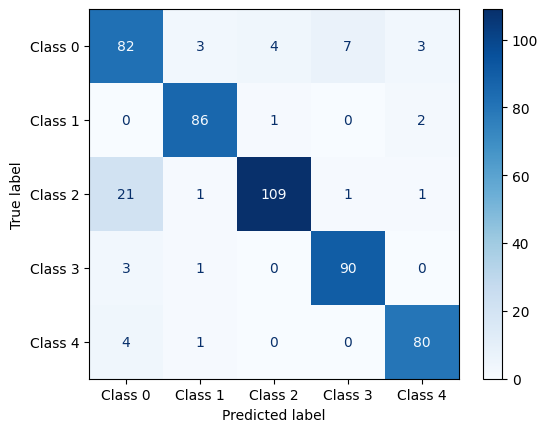

In [43]:
#confusion matrix for bert
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

pred = model.predict({'input_ids': x_test['input_ids'], 'attention_mask': x_test['attention_mask']})

class_pred = np.argmax(pred, axis=1)

class_true = np.argmax(to_categorical(X_test.cyberbullying_type), axis=1)

cm_bert = confusion_matrix(class_true, class_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_bert, display_labels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'])
disp.plot(cmap='Blues')